# Couple model

This notebook goes through the solution and simulation of the single model. 

We ensure the correctness of the solution by visualizing consumption and value functions and calculating Euler errors.

We ensure the empirical validity of the model by simulating a lifecycle and calculating retirement probabilities

Finally we time the model and simulation

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#test = RetirementClass(couple=True)
#test.solve()
test.simulate(accuracy=True)
#test.simulate()

In [10]:
np.sum(~np.isnan(test.sim.euler))

0

C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarning: Mean of empty slice
  total = np.nanmean(log_abs)
C:\Users\Frederik\Desktop\github\Main\funs.py:233: RuntimeWarnin

Total: nan


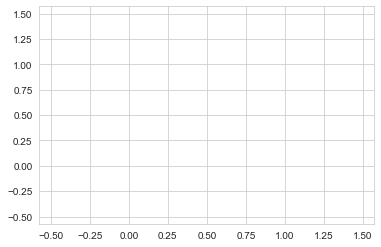

In [6]:
MA = [0,1]
ST = [0,1,2,3]
ages = [test.par.start_T,test.par.end_T-1]
for ma in MA:
    for st in ST:
        funs.log_euler(test,MA=[ma],ST=[st],ages=ages,plot=True)
print('Total:',funs.log_euler(test,ages=ages)[0])

C:\Users\Frederik\Desktop\github\Main\figs.py:456: RuntimeWarning: Mean of empty slice
  ax.plot(x,np.nanmean(y,axis=0),'r',label='Predicted')


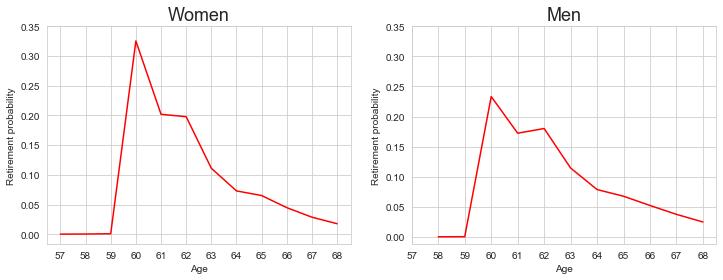

In [4]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs_c(test,axs[0],ma=0)
figs.retirement_probs_c(test,axs[1],ma=1)
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

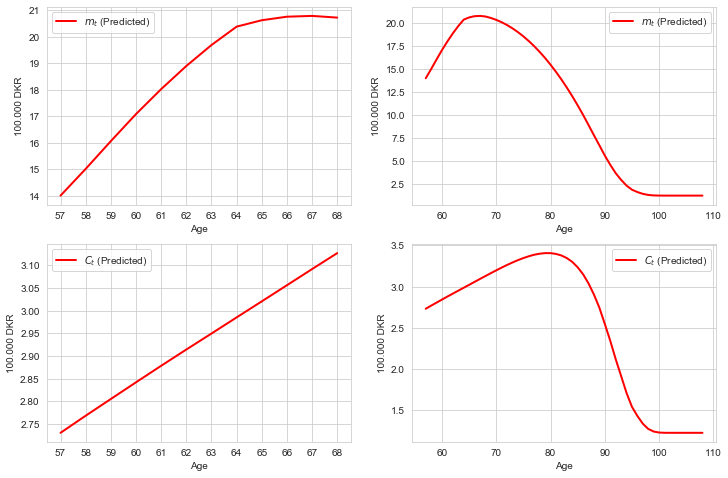

In [7]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle_c(test,axs[0,0],vars=['m'],quantiles=False)
figs.lifecycle_c(test,axs[0,1],vars=['m'],ages=[57,110],quantiles=False)
figs.lifecycle_c(test,axs[1,0],vars=['c'],quantiles=False)
figs.lifecycle_c(test,axs[1,1],vars=['c'],ages=[57,110],quantiles=False)
plt.show()

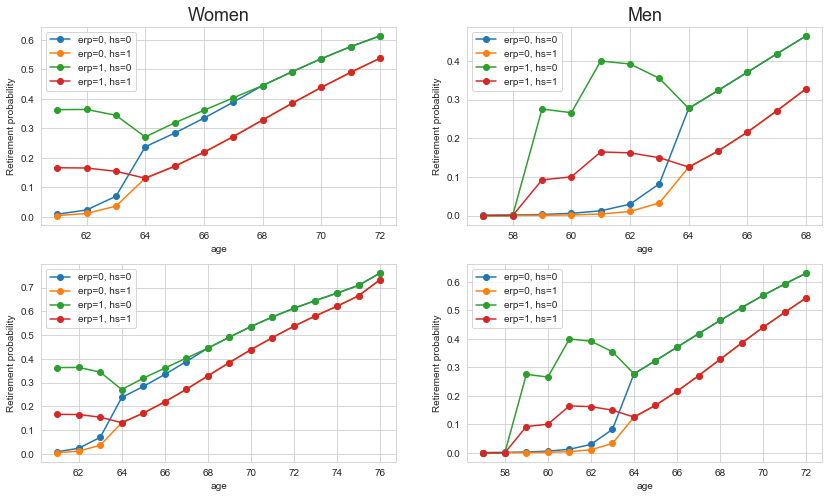

In [192]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
figs.choice_probs_c(test,axs[0,0],ma=0,ST=[0,1,2,3],ad=4)
figs.choice_probs_c(test,axs[0,1],ma=1,ST=[0,1,2,3],ad=4)
figs.choice_probs_c(test,axs[1,0],ma=0,ST=[0,1,2,3],ad=4, ages=[57,77])
figs.choice_probs_c(test,axs[1,1],ma=1,ST=[0,1,2,3],ad=4, ages=[57,77])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

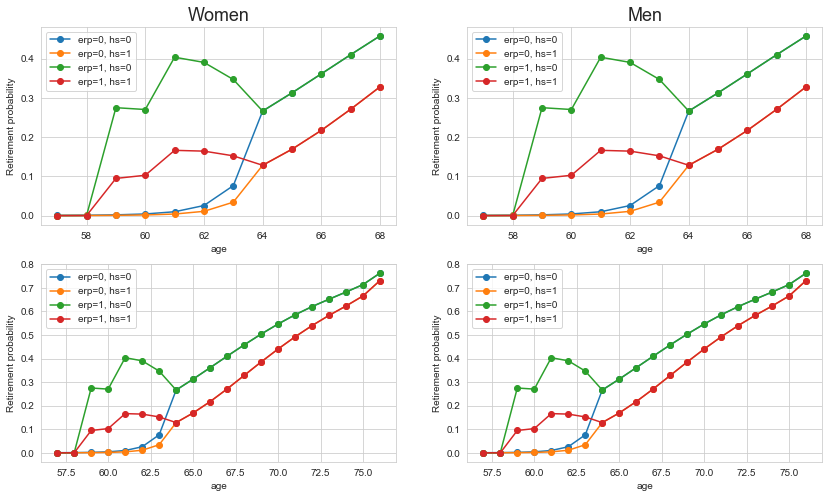

In [193]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
figs.choice_probs_c(test,axs[0,0],ma=0,ST=[0,1,2,3],ad=0)
figs.choice_probs_c(test,axs[0,1],ma=1,ST=[0,1,2,3],ad=0)
figs.choice_probs_c(test,axs[1,0],ma=0,ST=[0,1,2,3],ad=0, ages=[57,77])
figs.choice_probs_c(test,axs[1,1],ma=1,ST=[0,1,2,3],ad=0, ages=[57,77])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

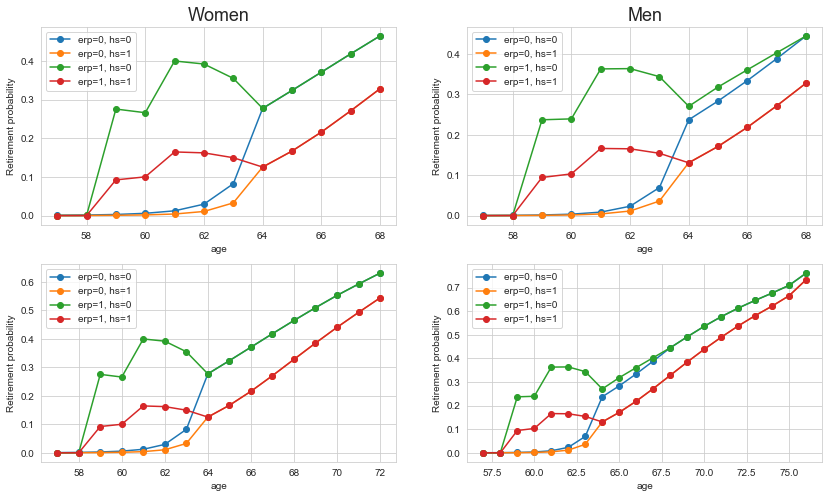

In [194]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
figs.choice_probs_c(test,axs[0,0],ma=0,ST=[0,1,2,3],ad=-4)
figs.choice_probs_c(test,axs[0,1],ma=1,ST=[0,1,2,3],ad=-4)
figs.choice_probs_c(test,axs[1,0],ma=0,ST=[0,1,2,3],ad=-4, ages=[57,77])
figs.choice_probs_c(test,axs[1,1],ma=1,ST=[0,1,2,3],ad=-4, ages=[57,77])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

# Consumption and value functions

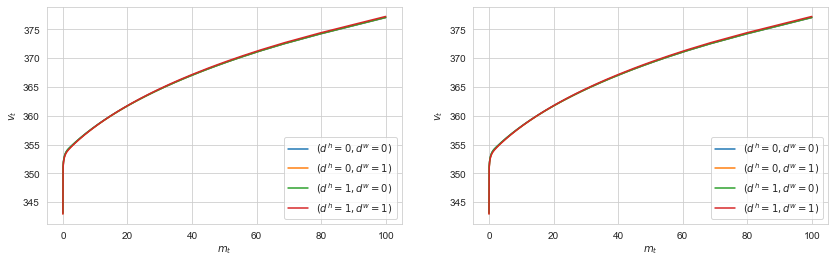

In [38]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[15],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'])#,xlim=[0,20],ylim=[445,460],bottom=1)
plt.show()

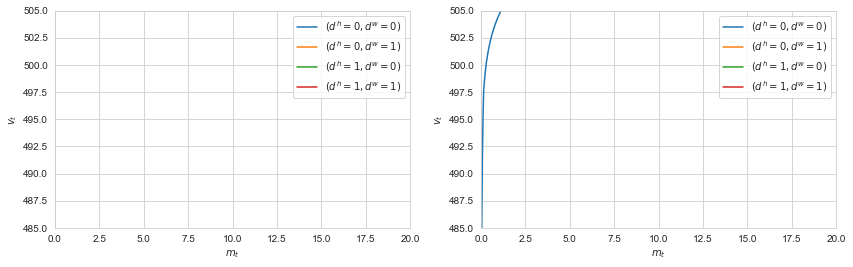

In [39]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy_c(test,axs[0],var='v',T=[4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
figs.policy_c(test,axs[1],var='v',T=[4],AD=[0],ST_h=[1],ST_w=[1],RA_h=[2],RA_w=[2],D_h=[0,1],D_w=[0,1],label=['d'],xlim=[0,20],ylim=[485,505],bottom=1)
plt.show()

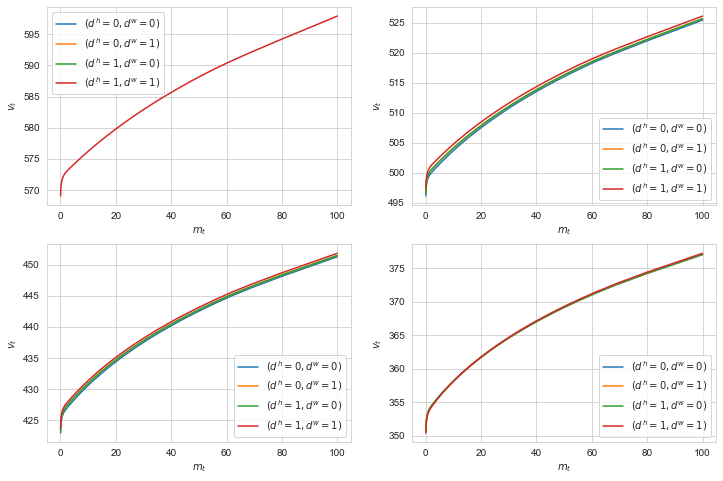

In [40]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'],bottom=1)
plt.show()

### We consider a household with zero age difference, where both are low skilled and no erp

### d_h=d_w=0

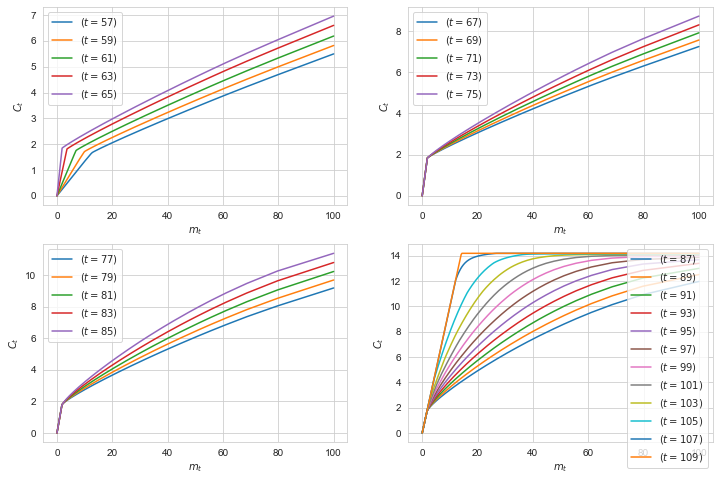

In [41]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

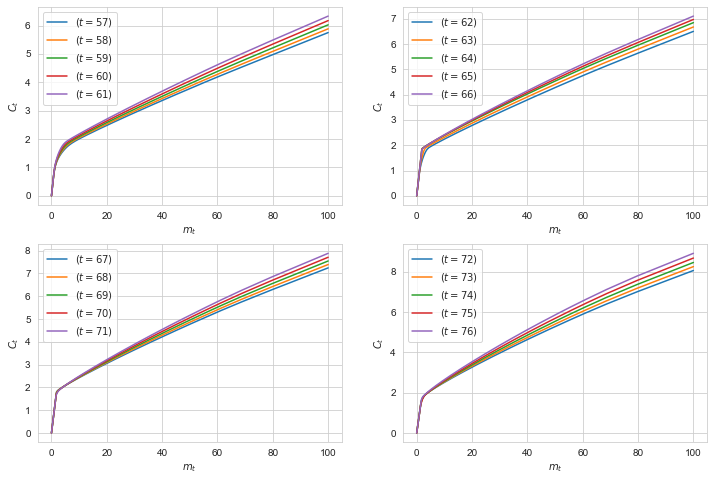

In [42]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = 1 and d_w = 0

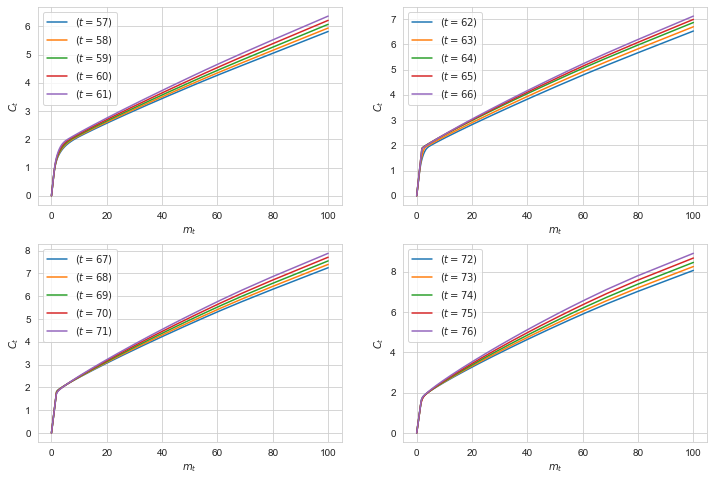

In [43]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
plt.show()

### d_h = d_w = 1

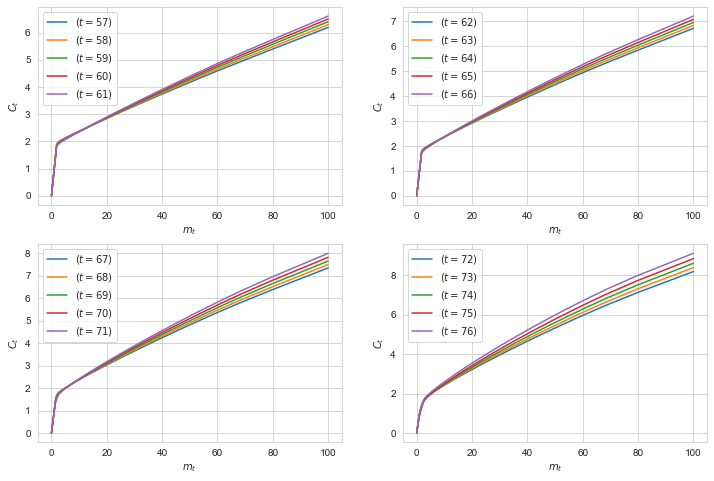

In [27]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

### Now we consider a household with erp and high skilled

### d_h=d_w=0

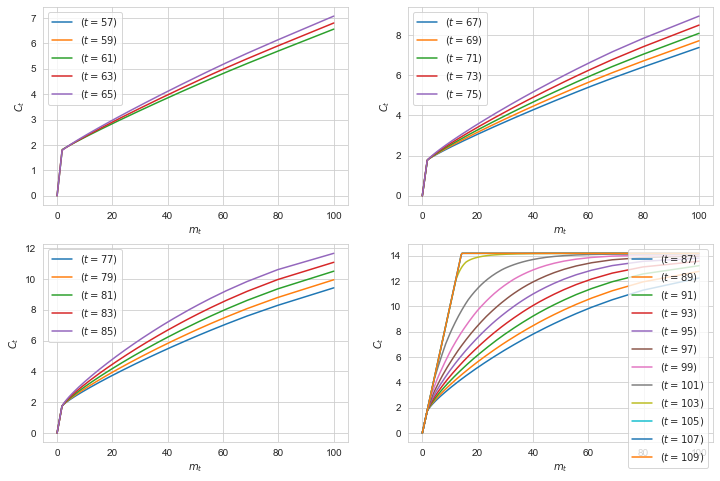

In [30]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

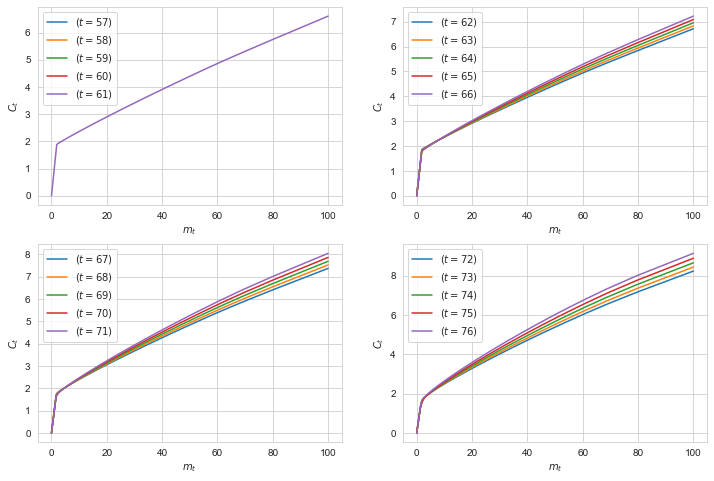

In [31]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = d_w = 1

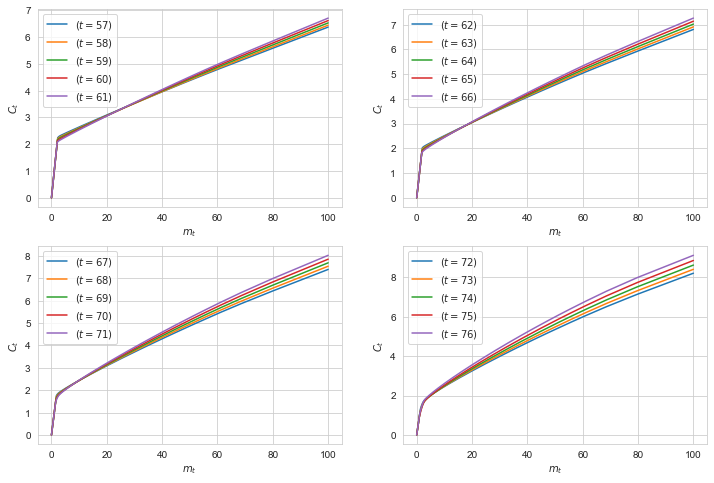

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
plt.show()

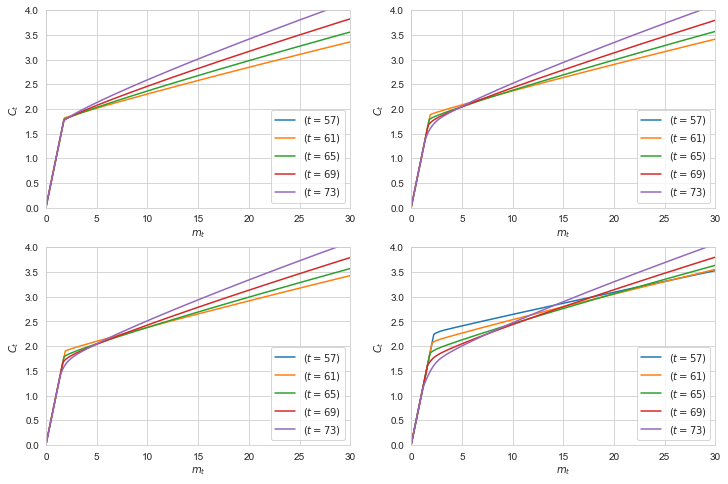

In [34]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[0,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
plt.show()

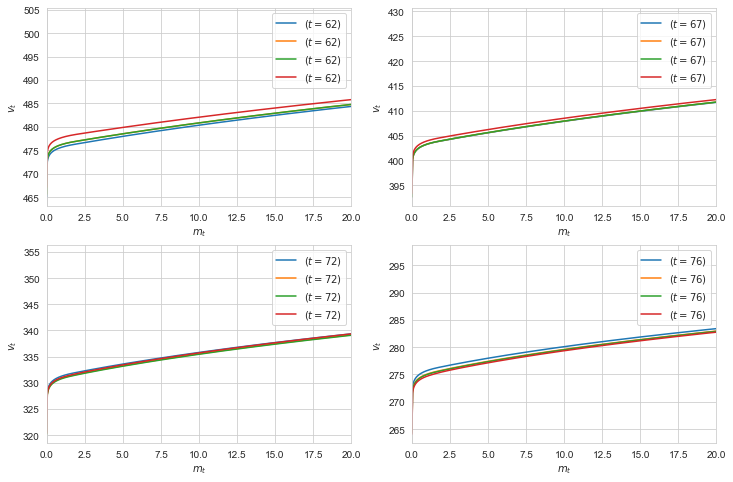

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy_c(test,axs[0,0],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[0,1],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,1],var='v',T=[19],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
plt.show()

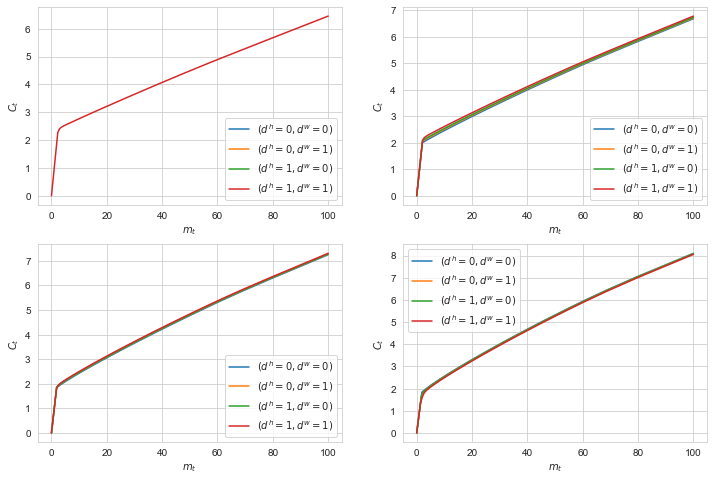

In [18]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='c',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='c',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='c',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

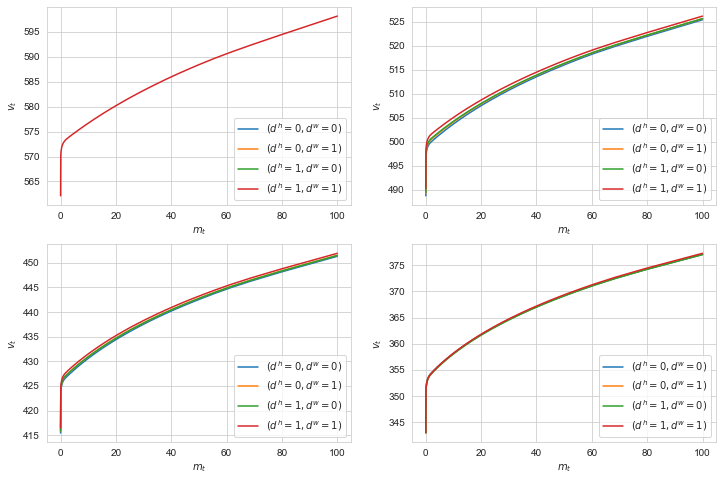

In [19]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

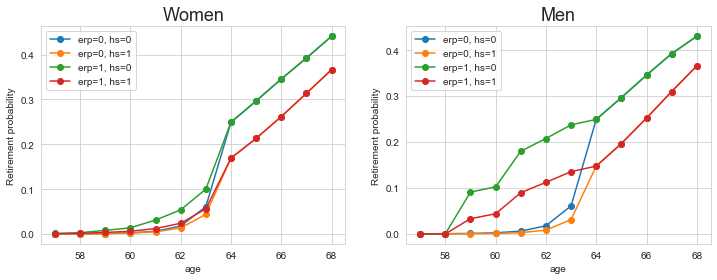

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs_c(test,axs[0],ma=0,ST=[0,1,2,3])
figs.choice_probs_c(test,axs[1],ma=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

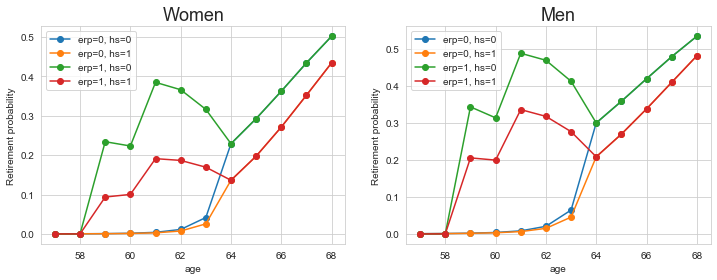

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test.Single,axs[0],AD=0,MA=0,ST=[0,1,2,3])
figs.choice_probs(test.Single,axs[1],AD=0,MA=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()